In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

In [35]:
np.random.seed(42)
x = np.random.rand(100,1) -0.5
y = 3*x[:,0]**2 +0.05 *np.random.randn(100)

In [36]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [37]:
dt_1 = DecisionTreeRegressor(max_depth= 2, random_state=42)
dt_1.fit(x,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [38]:
y2 = y - dt_1.predict(x)
dt_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_2.fit(x,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [39]:
y3 = y2 - dt_2.predict(x)
dt_3 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_3.fit(x,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [40]:
x_new = np.array([[0.3]]) 

In [41]:
y_pred_aarray = [tree.predict(x_new) for tree in (dt_1,dt_2,dt_3)]
y_pred = sum(y_pred_aarray)
y_pred

array([0.17052257])

In [42]:
y_pred_aarray

[array([0.12356613]), array([0.03991297]), array([0.00704347])]

In [43]:
def plot_predictions(regressors,x,y,axes,style = 'r-',label=None, data_style = 'b.'):
    x1 = np.linspace(axes[0], axes[1],500)
    y_pred = sum(regressor.predict(x1.reshape(-1,1))for regressor in regressors)
    plt.plot(x[:,0],y,data_style, lw = 2)
    plt.plot(x1,y_pred,style, lw = 2,label= label)
    plt.axis(axes)

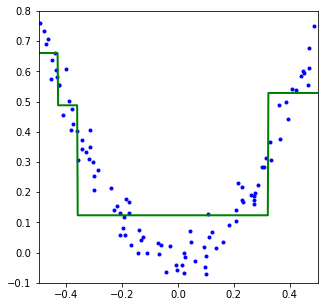

In [44]:
plt.figure(figsize=(5,5))

plot_predictions([dt_1],x,y,axes = [-0.5,0.5,-0.1,0.8], style = 'g-')


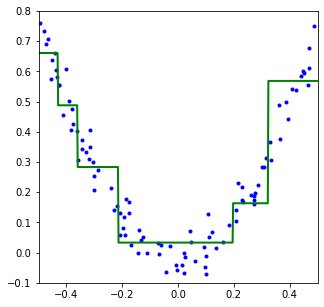

In [45]:
plt.figure(figsize=(5,5))

plot_predictions([dt_1,dt_2],x,y,axes = [-0.5,0.5,-0.1,0.8], style = 'g-')

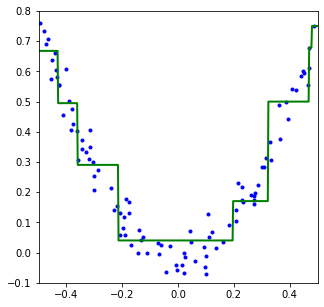

In [46]:
plt.figure(figsize=(5,5))

plot_predictions([dt_1,dt_2,dt_3],x,y,axes = [-0.5,0.5,-0.1,0.8], style = 'g-')

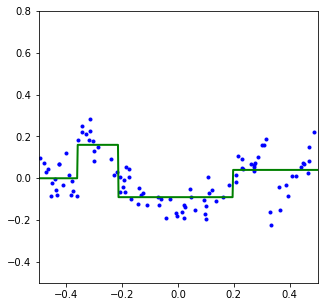

In [47]:
plt.figure(figsize=(5,5))

plot_predictions([dt_2],x,y2,axes = [-0.5,0.5,-0.5,0.8], style = 'g-')

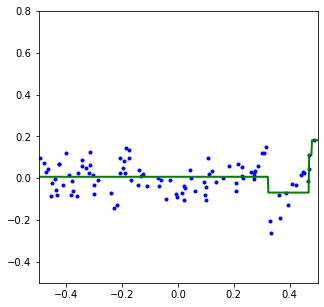

In [48]:
plt.figure(figsize=(5,5))

plot_predictions([dt_3],x,y3,axes = [-0.5,0.5,-0.5,0.8], style = 'g-')

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=0.1, random_state=42)
gbrt.fit(x,y)

GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

In [50]:
gbrt.predict(x_new)

array([0.28491853])

In [52]:
for i, y_pred in enumerate(gbrt.staged_predict(x)):
    x_ = gbrt.loss_(y,y_pred)
    print(x_)
    if x_<0.002:
        break
    print(i)

0.04764465381991766
0
0.0403629889655186
1
0.03436807660288836
2
0.02940401879121217
3
0.02566408261649072
4
0.022030359115393198
5
0.019116061552538505
6
0.016534140874705915
7
0.014384068982595689
8
0.012583552023704479
9
0.011129489512017136
10
0.00997541340545445
11
0.00882675253304006
12
0.007933890138589328
13
0.007196407291525276
14
0.006563781847832413
15
0.006022596579032788
16
0.005403487547077464
17
0.004935743997108108
18
0.004480216393382758
19
0.0041511141327776405
20
0.0037661420830949273
21
0.0035033686563123185
22
0.003216775966133666
23
0.002904652648127405
24
0.002735944574608821
25
0.002593108629122235
26
0.002378188885128215
27
0.0021618964019748618
28
0.002059908678987899
29
0.0019638442062578504
